In [4]:
import pandas as pd

# Load cleaned data
df = pd.read_csv('../outputs/cleaned_data_v1.csv')

# Basic info
print("🔹 Dataset shape:", df.shape)
print("\n🔹 First 5 rows:\n", df.head())

# Data types and nulls
print("\n🔹 Data types and missing values:\n")
print(df.info())

# Statistical summary
print("\n🔹 Statistical summary (numerical columns):\n")
print(df.describe())

# Count unique values in categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"🔹 Column: {col} - Unique values: {df[col].nunique()}")


🔹 Dataset shape: (980, 15)

🔹 First 5 rows:
      Claim ID  Provider ID  Patient ID Date of Service  Billed Amount  \
0  0HO1FSN4AP    126528997  7936697103      08/07/2024            304   
1  9U86CI2P5A   6986719948  1547160031      06/21/2024            348   
2  1QEU1AIDAU   1355108115  2611585318      07/04/2024            235   
3  WH7XDS8CEO   9991055906  7167948632      05/26/2024            112   
4  M6OJEZ8KGI   7382167012  2140226267      07/16/2024            406   

   Procedure Code Diagnosis Code  Allowed Amount  Paid Amount Insurance Type  \
0           99231          A02.1             218          203       Self-Pay   
1           99213          A16.5             216          206       Medicare   
2           99213          A00.1             148          119     Commercial   
3           99215          A18.6              79           69       Medicare   
4           99238          A17.9             320          259       Medicare   

   Claim Status                    

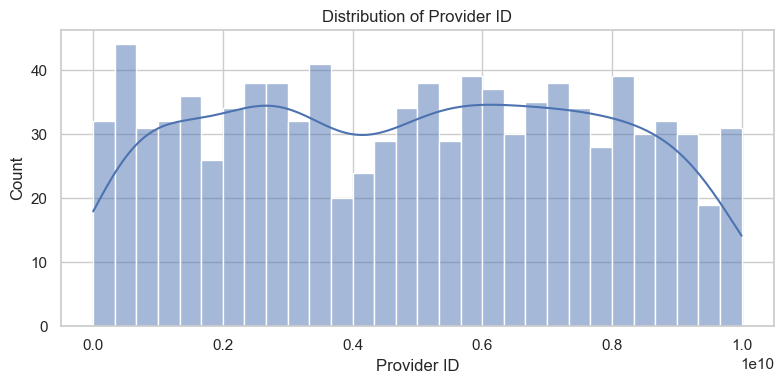

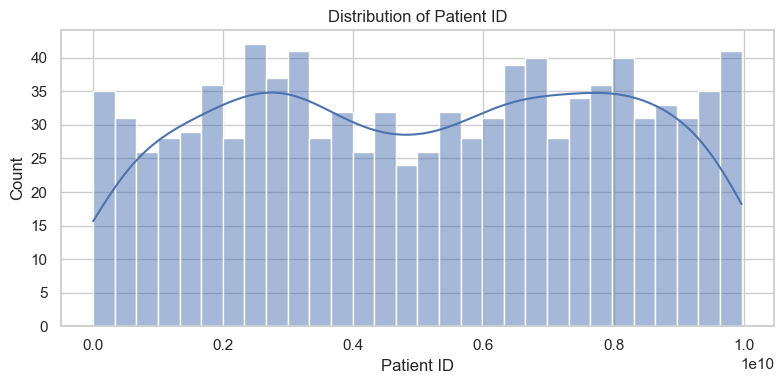

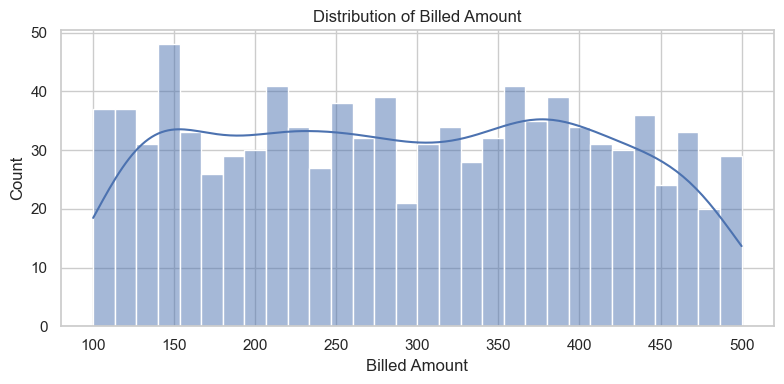

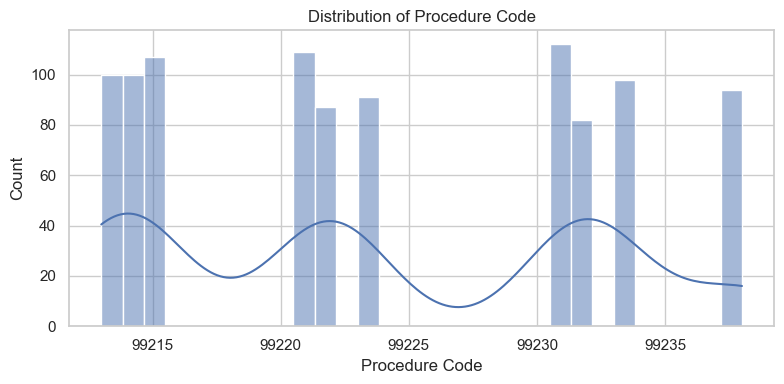

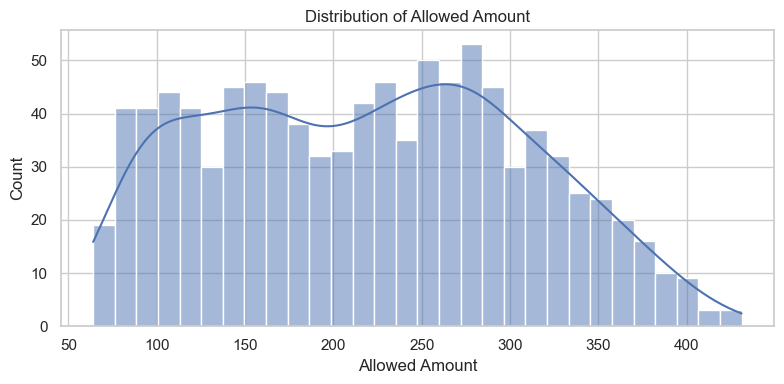

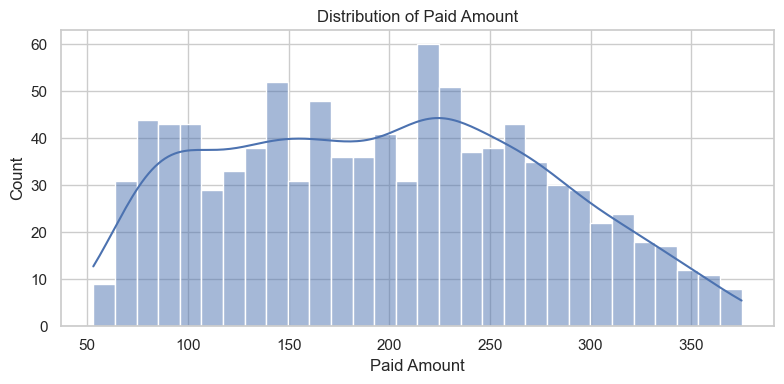

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Numerical columns
num_cols = df.select_dtypes(include='number').columns

# Plot histograms for numeric columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


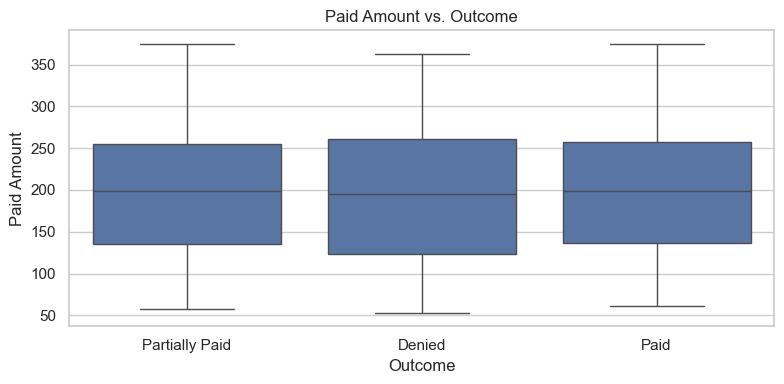

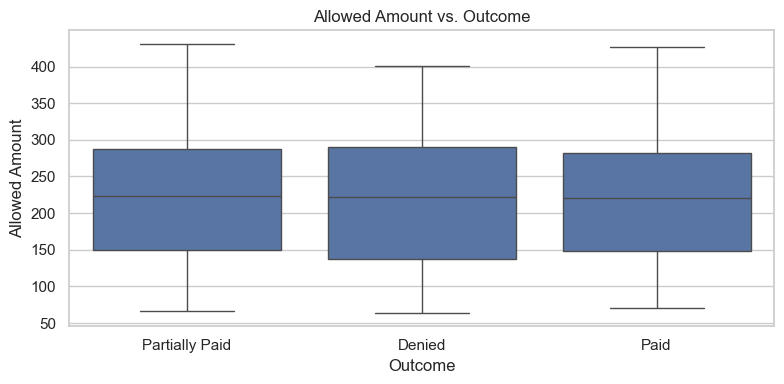

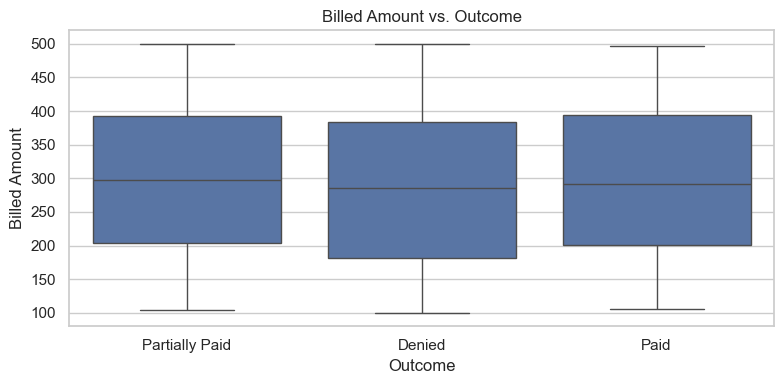

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Paid Amount vs. Outcome
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Outcome', y='Paid Amount')
plt.title('Paid Amount vs. Outcome')
plt.tight_layout()
plt.show()

# Plot 2: Allowed Amount vs. Outcome
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Outcome', y='Allowed Amount')
plt.title('Allowed Amount vs. Outcome')
plt.tight_layout()
plt.show()

# Plot 3: Billed Amount vs. Outcome
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Outcome', y='Billed Amount')
plt.title('Billed Amount vs. Outcome')
plt.tight_layout()
plt.show()


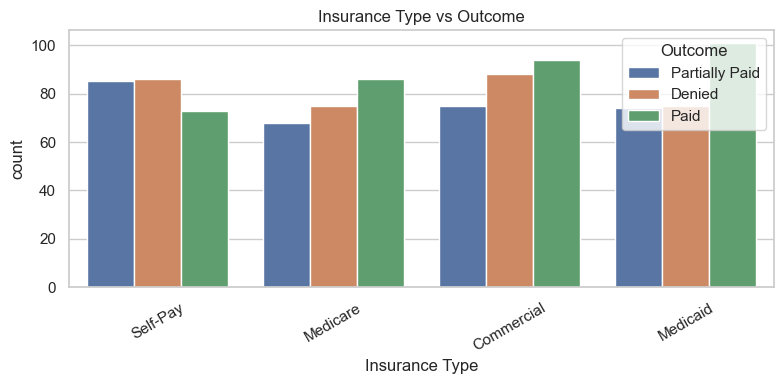

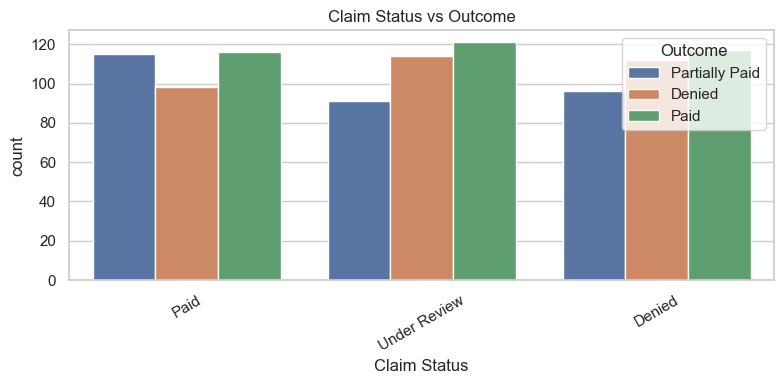

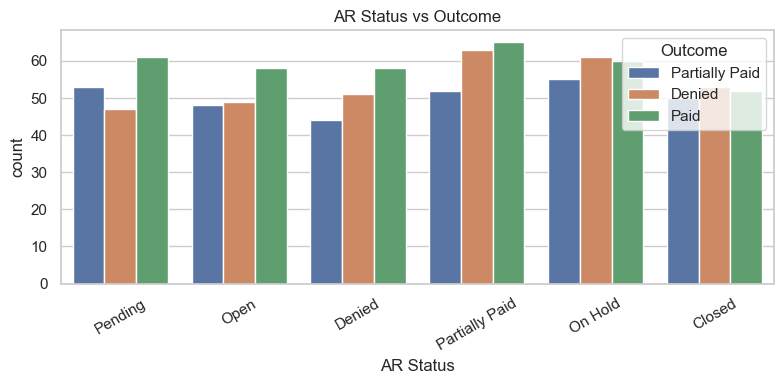

In [10]:
# Plot 4: Insurance Type vs Outcome
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Insurance Type', hue='Outcome')
plt.title('Insurance Type vs Outcome')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Plot 5: Claim Status vs Outcome
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Claim Status', hue='Outcome')
plt.title('Claim Status vs Outcome')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Plot 6: AR Status vs Outcome
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='AR Status', hue='Outcome')
plt.title('AR Status vs Outcome')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


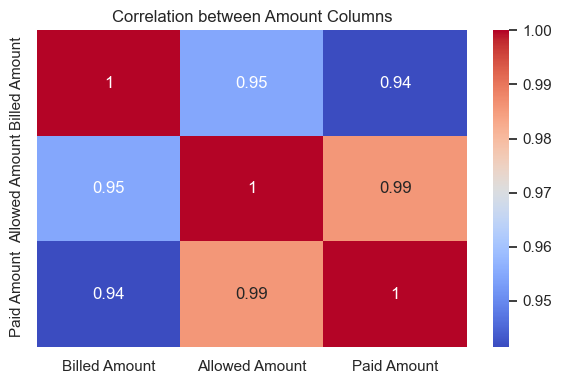

In [11]:
# Select numeric features
num_cols = ['Billed Amount', 'Allowed Amount', 'Paid Amount']

# Correlation matrix
corr = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Amount Columns')
plt.tight_layout()
plt.show()


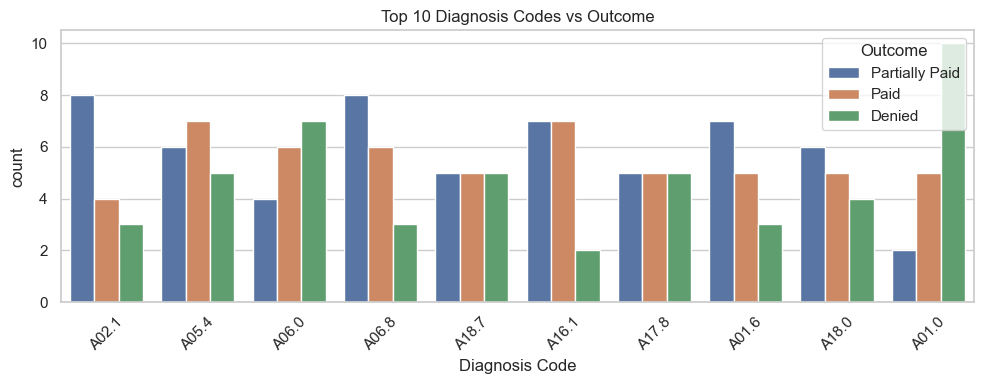

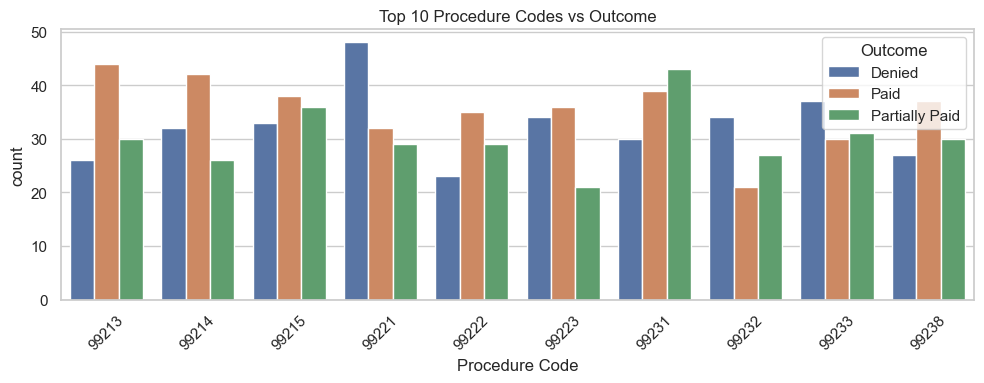

In [12]:
# Plot 7: Diagnosis Code vs Outcome
top_diag = df['Diagnosis Code'].value_counts().nlargest(10).index
diag_subset = df[df['Diagnosis Code'].isin(top_diag)]

plt.figure(figsize=(10, 4))
sns.countplot(data=diag_subset, x='Diagnosis Code', hue='Outcome')
plt.title('Top 10 Diagnosis Codes vs Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 8: Procedure Code vs Outcome
top_proc = df['Procedure Code'].value_counts().nlargest(10).index
proc_subset = df[df['Procedure Code'].isin(top_proc)]

plt.figure(figsize=(10, 4))
sns.countplot(data=proc_subset, x='Procedure Code', hue='Outcome')
plt.title('Top 10 Procedure Codes vs Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
